# The Curious Tale of a Distasteful Infidelity

Ada barely finished her first coffee when she was alerted by a meeting invite appearing on her screen. "Urgent: TasteMap User Satisfaction Review - Location Matching Issues." Sarah, the Product Owner, had scheduled an emergency meeting for 9 AM.

8:53 AM.

Three months into her role as Senior Data Analyst at TasteMap, Ada was still adjusting to these urgent meeting invites. But something about this one felt different.

During her first months, Ada had managed to set up a monitoring system for business metrics with minimal engineering support — a side project she'd pushed through after numerous discussions. She opened the dashboard. All metrics were green. Had she missed something?

8:58 AM: A notification popped up that Ben had started the meeting.

Ben? The Director of Search? So far, she'd never had any direct contact with him. Her suspicion about this meeting deepened. Word around the office was that Ben had his eyes on the CTO position. His presence at this level of meeting was highly unusual.

Ada took a few deep breaths before joining, waiting an extra moment in the hope she wouldn't be alone with Ben and forced into awkward small talk. When she finally clicked the link, she was relieved to see Rob already there. As the Staff Software Engineer responsible for search, his presence made sense — but the concern on his face didn't.

Sarah joined. She did not spend much time with niceties and jumped straight into the topic:

"Thank you all for joining on such short notice," Sarah began tensely. "We've just received the results from our user feedback survey. While users are generally satisfied with our cuisine matching, there's a significant issue with location relevance. In fact, it's emerged as the number one complaint in the survey."

Sarah shared her screen and showed following plot:
- x axis categories
- y-axis fraction of people reporting unhappiness


While Sarah went through the plot, Ada quickly jotted down questions in her notebook:
- n=2547 only?
- how many people were exposed to the study?
- is it the first study conducted like this? are there any baselines?
Ada raised her hand.

Sarah closed her screen share with a sharp click. "Given our tough market position and all the investments into the search recently, we cannot risk having issues with location matching."

"I've been advocating strongly for resources on our hybrid vector-based search," Ben interjected. "I've put my name behind this initiative." He paused. "I want you to focus on fixing this location issue immediately." Without waiting for responses, he excused himself for another appointment.

Ada knew about the search department's recent efforts, moving from their old lexicographical search to a more semantically oriented hybrid vector-based approach. Despite initial setbacks and some failed A/B tests, the new search had ultimately outperformed the old system.

Sarah, now a bit calmer after Ben's departure: "Rob, have there been any major releases that might have impacted the location search?"

Rob shook his head. "Nothing obvious, but I'll double-check with the team and review the latest releases."

Still ignoring Ada's raised hand, Sarah wrapped up the meeting. "Ada, I'll share the user feedback report with you. Drop your current priorities and work with Rob to get to the bottom of this. I need frequent updates on your progress. This is already on the C-Level radar."


9:12 AM. Her coffee was cold by now. The report hadn't arrived in her inbox yet, so Ada decided to message Rob about the user survey he'd helped set up.

The feedback campaign, she learned, had been conducted through TasteMap's Email Channel reaching millions of active users who received restaurant suggestions tailored to their preferences. Rob's response confirmed her initial suspicions: the number of respondents (n=2547) was surprisingly low. Moreover, this was the first such survey, part of a new company initiative supposedly "moving closer to the end user."

Curious about the technical details, Ada asked Rob about the revamped search system. He explained that restaurants were ranked based on a weighted combination of cuisine fit and location fit, with results shown to users only when the combined score exceeded a certain threshold. Rob, known for his reputation for hands-on crisis turn-around, had already opened a PR increasing the location weight in hopes of improving match precision.

"I hope to demo it to Sarah tomorrow, so we can target an A/B test next week," he concluded his remarks.

Ada thanked Rob for his insights and turned to the feedback report Sarah had just shared. The data came as a massive Excel spreadsheet—2,547 rows of user ratings across different matching dimensions. At the bottom of each entry, users had the option to leave comments. While some feedback was thoughtfully detailed, many others were... less helpful:
- "why no mcdonalds????"
- "jkhfkjashfkjash"
- "PLEASE STOP SENDING ME EMAILS!!!!!"
- "can i get a free meal?"
- "your mum..."
...


With no more meetings scheduled, Ada walked to the office kitchen for her second coffee of the day. While waiting at the machine, she leaned against the counter, her thoughts drifting to her path here. Three months ago, she'd left her postdoc position in Sociology, where she'd studied fairness and racial bias. The constant chase for funding and the pressure to publish had worn her down. Yet even then, she'd found herself coding late into the night developing a soft spot for elegant code.
TasteMap had seemed perfect — a place where her diverse skills could drive real impact, instead of rushing after the next statistically significant result.

Fresh coffee in hand, Ada found her way to the kitchen windows. Being on the 12th floor offered a perspective that helped quieten her mind and provided a welcome break. Ada thought about the numerous administratively collected datasets related to traffic accidents and police violence encountered during her PhD. All distorted by selection bias. Ada straightened suddenly: 
"Not just the low survey response rate leading to a non-represantative sample. But the whole search results presented to the user..."
She was looking at a textbook case of collider bias. 
As Rob explained, the algorithm only showed restaurants exceeding a relevance threshold driven by cuisine- and location-fit. 

Ada rushed back to her desk, her mind still racing with thoughts. The familiar blink of unread messages on her desktop stopped her momentum - Rob asking her to check his new location-weighted matching algorithm on the playground server.

Sarah had sent two messages in quick succession:

"Hi Ada. Can you please help Rob evaluate the updated matching? It would be great to have some initial eye balling done by the end of today so we can eye some AB Test next week."

Ten minutes later:

"Can you confirm your availability for tomorrow's 9AM meeting? Haven't seen your response yet."

The calendar invite showed tomorrow at 9AM, with Ben marked as optional:

"Thanks for the quick turnaround, @Rob. Let's review an initial analysis from @Ada to determine if we're ready for an A/B test next week."

Ada's cursor hovered over the "accept" button longer than usual. If she was right, she would need to make a compelling case for the bias. She replied Sarah first:

"Thanks, I will provide an initial analysis," Ada wrote, deliberately keeping her response vague not to stir up any drama just yet.

Ada opened a new notebook file, her fingers automatically typing: 

# Collider Bias - A Simulation

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

## Creating Our Simulated World
First, let's create a world where:
- Each restaurant has a location match score (how close it is to where the user dine)
- Each resuataurant has a cuisine matching score (how well it matches what the user is looking for)

In [11]:
n_samples = 3000

# Generate two features that influence matching
u = np.random.normal(0, 1, n_samples)  # Primary feature (e.g., cuisine relevance)
v = np.random.normal(0, 1, n_samples)  # Secondary feature (e.g., location fit)


Even though Location (V) and Cuisine (U) matches are naturally independent, the selection mechanism creates an artificial negative correlation in your observed data. Here's why:
- For a restaurant to be shown (S=1):
    - If cuisine match (U) is low, location match (V) must be very high
    - If location match (V) is low, cuisine match (U) must be very high

This creates a "collider" at S, where conditioning on being shown (S=1) induces a negative correlation between U and V.

In [12]:
# Simulate Selection mechanism based on feature combination
weight_u = 0.7
weight_v = 0.3
S = np.where(weight_u * u + weight_v * v > 0.5, 1, 0)  # Item is shown if combination exceeds threshold


Text(0.5, 1.0, 'Effect of Selection Mechanism')

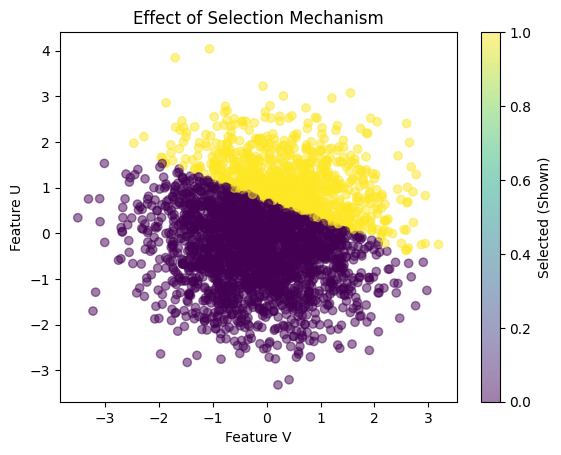

In [13]:
plt.scatter(v, u, c=S, cmap='viridis', alpha=0.5)
plt.colorbar(label='Selected (Shown)')
plt.xlabel('Feature V')
plt.ylabel('Feature U')
plt.title('Effect of Selection Mechanism')

In [14]:
corr_selected_v_u = stats.pearsonr(v[S==1], u[S==1])[0]
corr_unselected_v_u = stats.pearsonr(v, u)[0]

print(f"Correlation between V and U in selected data: {corr_selected_v_u:.3f}")
print(f"Correlation between V and U in unselected data: {corr_unselected_v_u:.3f}")

Correlation between V and U in selected data: -0.498
Correlation between V and U in unselected data: 0.006


# Modeling True User Conversion Behavior

To assess how changing our location weights will affect business metrics, we first need to model how users *actually* respond to recommendations. We assume:

1. Users care about both location and cuisine match
   - Cuisine match has stronger impact (0.75)
   - Location has moderate impact (0.25)
   
2. The relationship models binary outcomes (convert/no-convert)
   - inverse logit link transforms scores into probabilities [0,1]
   - Each recommendation either succeeds or fails (binomial)

   
3. Other factors (price, reviews, mood) add random noise

Statistical Model:

``conversion ~ Binomial(n, p)``

``logit(p) = score``

``score ~ N(μ, 1)``

``μ = -3 + 0.25 * location + 0.75 * cuisine``





In [29]:
# Create a compose function to chain operations as a helper
def compose(*functions):
    def inner(x):
        intermediates = [] 
        current = x
        
        for f in functions: 
            current = f(current)
            intermediates.append(current)
            
        return intermediates
    return inner


# logit link transforming linear model into probability
def invlogit(x):
    return 1 / (1 + np.exp(-x))


# TODO: 
# -Make Selection mechanism the only variable, as the conversion params are fixed
# Optional TODO:
# -Add selection mechanism
# -think about adding u and v directly

# Create the simulation
def conversion_simulation(n_samples, 
                          base, 
                          l_weight,
                          l_score, 
                          c_weight,
                          c_score,
                          S):
    mu = base + l_weight * l_score + c_weight * c_score                     # μ = base + l_weight * l_score + c_weight * c_score
    model = compose(
        lambda mu: np.random.normal(loc=mu, scale=1, size=n_samples),       # score ~ N(mu, 1)
        invlogit,                                                           # logit(p) = score
        lambda match_p: np.random.binomial(n=n_samples, p=match_p)          # conversion ~ Binomial(n, p)        
    )
    return lambda : model(mu)


# define conversion model
model = conversion_simulation(n_samples=n_samples, 
                              base = -3,
                              l_weight=0.25,
                              l_score=v,
                              c_weight=0.75,
                              c_score=u)
# Run conversion simulation
[scores_control, match_p_control, matches_control] = model()

In [30]:
# Calculate correlations in full dataset of linear model vs selected dataset
corr_full = stats.pearsonr(v, scores_control)[0]
corr_selected = stats.pearsonr(v[S==1], scores_control[S==1])[0]

print(f"Correlation between V and conversion in unselected data: {corr_full:.3f}")
print(f"Correlation between V and conversion selected data: {corr_selected:.3f}")

Correlation between V and conversion in unselected data: 0.189
Correlation between V and conversion selected data: -0.057


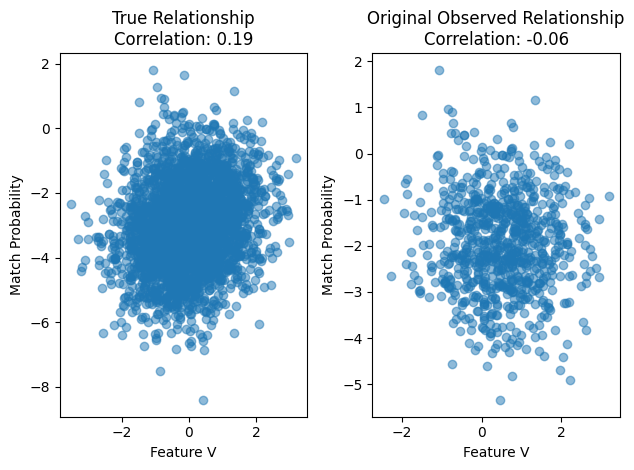

In [31]:
plt.subplot(1, 2, 1)
plt.scatter(v, scores_control, alpha=0.5)
plt.xlabel('Feature V')
plt.ylabel('Match Probability')
plt.title(f'True Relationship\nCorrelation: {corr_full:.2f}')

plt.subplot(1, 2, 2)
plt.scatter(v[S==1], scores_control[S==1], alpha=0.5)
plt.xlabel('Feature V')
plt.ylabel('Match Probability')
plt.title(f'Original Observed Relationship\nCorrelation: {corr_selected:.2f}')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Intervention Selection Mechanism\n(Heavy Feature V Weight)')

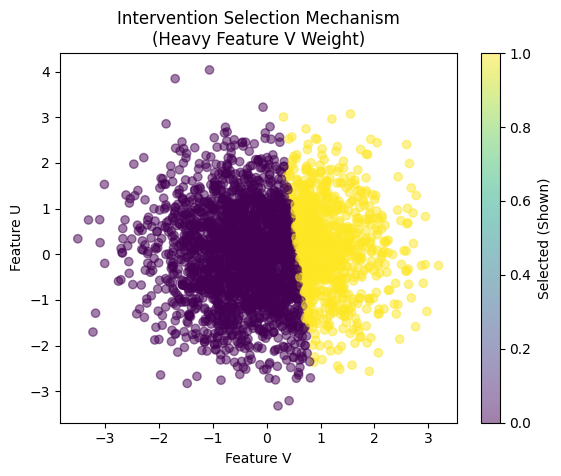

In [32]:
# Simulate intervention: New selection mechanism with different weights
S_intervention = np.where(0.9 * v + 0.1 * u > 0.5, 1, 0)  # Modified feature weights

# Run a 2nd conversion simulation for intervention
[scores_intervention, match_p_intervention, matches_intervention] = model()

# Calculate correlations for intervention dataset
corr_intervention = stats.pearsonr(v[S_intervention==1], matches_intervention[S_intervention==1])


plt.scatter(v, u, c=S_intervention, cmap='viridis', alpha=0.5)
plt.colorbar(label='Selected (Shown)')
plt.xlabel('Feature V')
plt.ylabel('Feature U')
plt.title('Intervention Selection Mechanism\n(Heavy Feature V Weight)')

Text(0.5, 1.0, 'Post-Intervention Relationship\nCorrelation: 0.03')

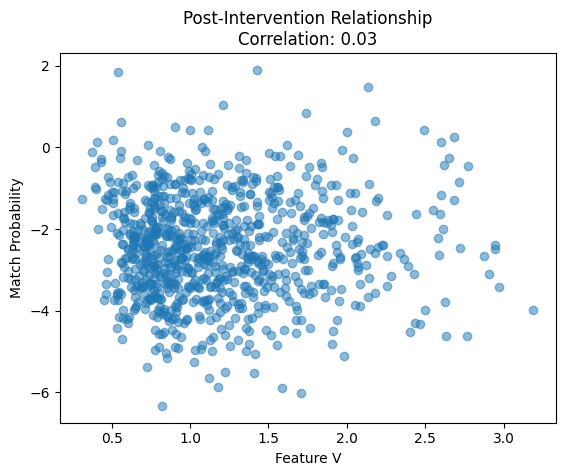

In [33]:
plt.scatter(v[S_intervention==1], scores_intervention[S_intervention==1], alpha=0.5)
plt.xlabel('Feature V')
plt.ylabel('Match Probability')
plt.title(f'Post-Intervention Relationship\nCorrelation: {corr_intervention[0]:.2f}')


In [34]:
# Calculate business metrics
true_matches = np.random.binomial(n=1, p=match_p_control[S==1])
adjusted_matches = np.random.binomial(n=1, p=match_p_intervention[S_intervention==1])

print("\nBusiness Metrics:")
print(f"Estimated num. matches (original): {np.sum(true_matches):.3f}")
print(f"Estimated num. matches (intervention): {np.sum(adjusted_matches):.3f}")



Business Metrics:
Estimated num. matches (original): 121.000
Estimated num. matches (intervention): 104.000


In [63]:


#Plot histogram of the difference in matches between the treatment and control groups
plt.hist(treatment - control, bins=100)
plt.xlabel('Difference in Matches')
plt.ylabel('Frequency')
plt.title('Histogram of Difference in Matches between Treatment and Control Groups')
plt.show()


TypeError: binomial() takes at least 2 positional arguments (0 given)

In [62]:
control.shape

(864,)

In [58]:
treatment[0]

722

In [65]:
true_matches.shape

(752,)